In [ ]:
Business Objective:
              Enhance Customer Satisfaction: Improve sentiment scores by addressing negative feedback and promoting positive reviews.
Maximized/Minimized:
              Maximized: Positive sentiment and brand loyalty.
              Minimized: Negative reviews and customer complaints.
Constraints:
              Data Quality: Ensure accurate sentiment analysis.
              Resource Allocation: Limitations in budget and manpower.

In [ ]:
#First we will go for web scraping .
#We will scrap Trustpilot Website in which we will scrap reviews of the boat service .
#We will web scarp review of boat products from which we will scrap 1.Title of review ,2. Body of the Review , 3.Peviewers Name

In [ ]:
#Defining the libraries that will be required for web scraping  
import pandas as pd
import bs4
from bs4 import BeautifulSoup as bs
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
page=requests.get("https://www.trustpilot.com/review/www.boat-lifestyle.com")
page
#Here we got response =200 means we are successfully connected to trustpilot website

<Response [200]>

In [5]:
page.content
soup=bs(page.content,"html.parser")
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>
<html lang="en-US"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><link href="https://cdn.trustpilot.net/brand-assets/4.3.0/favicons/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="/manifest.json" rel="manifest"/><meta content="Trustpilot" name="application-name"/><meta content="#1c1c1c" name="theme-color"/><link href="https://cdn.trustpilot.net/brand-assets/4.3.0/favicons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/><link href="https://cdn.trustpilot.net/brand-assets/4.3.0/favicons/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/><link href="https://cdn.trustpilot.net/brand-assets/4.3.0/favicons/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/><link color="#00b67a" href="https://cdn.trustpilot.net/brand-assets/4.3.0/favicons/safari-pinned-tab.svg" rel="mask-icon"/><meta content="Trustpilot" name="apple-mobile-web-app-title"/><met

In [7]:
#Here we will Extarct our Review Title which is having <h2> tag and class as aa "typography_heading-s__f7029 typography_appearance-default__AAY17"
title=soup.find_all("h2",class_="typography_heading-s__f7029 typography_appearance-default__AAY17")
title

[<h2 class="typography_heading-s__f7029 typography_appearance-default__AAY17" data-service-review-title-typography="true">boAt  service  very bad</h2>,
 <h2 class="typography_heading-s__f7029 typography_appearance-default__AAY17" data-service-review-title-typography="true">I have bought boAt Rockerz 255 pro+…</h2>,
 <h2 class="typography_heading-s__f7029 typography_appearance-default__AAY17" data-service-review-title-typography="true">Received used product </h2>,
 <h2 class="typography_heading-s__f7029 typography_appearance-default__AAY17" data-service-review-title-typography="true">Return Problem</h2>,
 <h2 class="typography_heading-s__f7029 typography_appearance-default__AAY17" data-service-review-title-typography="true">Don’t buy any product from boat brand</h2>,
 <h2 class="typography_heading-s__f7029 typography_appearance-default__AAY17" data-service-review-title-typography="true">Very disappointed from the service of…</h2>,
 <h2 class="typography_heading-s__f7029 typography_appea

In [9]:
#We have extracted title but it is not clean now we will clean the title
review_title=[]
for i  in range(0,len(title)):
    review_title.append(title[i].get_text())
review_title
review_title[:]=[title.strip('\n') for title in review_title]
review_title


['boAt  service  very bad',
 'I have bought boAt Rockerz 255 pro+…',
 'Received used product ',
 'Return Problem',
 'Don’t buy any product from boat brand',
 'Very disappointed from the service of…',
 'Plz add calculator any one game and grade view option menue style',
 'Defective product delivered',
 'Worst service & products',
 'Pathetic Customer service of Boat Lifestyle',
 'BoAt makes Amazon delete any negative reviews!',
 'Do not waste your money on buying boat products ',
 'Please do not purchase any products…',
 "It's a waste buying boat products",
 '1 year fake Warranty from boat',
 'My bluetooth headphone had damage…',
 'Boat is the worst Bluetooth earphone…',
 'My ticket no is-45884876 I purchas a…',
 'Wonderful experience',
 'Good Experience']

In [11]:
len(review_title)  #Checking the length of review title


20

In [13]:
#Let us scrap the review body
review=soup.find_all('p',class_='typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn')
review
review_body=[]
for i  in range(0,len(review)):
    review_body.append(review[i].get_text())
review_body

[' boAt  service  very bad. 😡      My  product   Avante Bar Raga Pitch Black  model.   Speaker problem  i  contact boat service centre my complain ignore two month  no sarvice     boat  agent timing after 24 hours after 42 hours after 72 hours only harassment 😡 exactly time not  say  my product warranty valid after 1month I want to claim boat service centre and what company boat company very bad very bad service  boat  product very bad 😡',
 'I have bought boAt Rockerz 255 pro+ which always slips from my ear as one side is over weighted due to controllers.- Recently, the voice began to break in-between when watching videos. - Most of the times although it is connected to my device it is still saying "YOuR deViCe iS rEaDy tO pAiR".',
 "I placed an order on August 16, 2024. It was supposed to be delivered on the 24th, but it wasn't. They gave me a 28-day delivery window, yet it still wasn't delivered. Finally, it arrived on August 30, 2024, but when I opened it, I found that it was a used

In [15]:
len(review_body)

20

In [17]:
#Let us scrap the reviewers_name
reviewer=soup.find_all("span",class_="typography_heading-xxs__QKBS8 typography_appearance-default__AAY17")
reviewer
reviewer_name=[]
for i  in range(0,len(reviewer)):
    reviewer_name.append(reviewer[i].get_text())
reviewer_name

['Ashok Pal',
 'Pavan Kumar',
 'Nisha',
 'Aashish Sonar',
 'Snehal Solanki',
 'Meet Bhayani',
 'Sovit Gautam',
 'Vini',
 'Farha P',
 'Deepak Goswami',
 'Dr. Pureview',
 'Ashwani Bansal',
 'Ravi K',
 'Jasmine Mishra',
 'Vishnu Shukant Sudarshan',
 'Naren More',
 'Devdath K.K.',
 'SANTOSH KUMAR PANIGRAHI',
 'Plug nwork',
 'Sheshu']

In [19]:
len(reviewer_name)

20

In [21]:
#create a dataframe
import pandas as pd
df=pd.DataFrame()
df['Review_title']=review_title
df['Review']=review_body
df['Reviewers_Name']=reviewer_name
df

,Review_title,Review,Reviewers_Name
0,boAt service very bad,boAt service very bad. 😡 My product ...,Ashok Pal
1,I have bought boAt Rockerz 255 pro+…,I have bought boAt Rockerz 255 pro+ which alwa...,Pavan Kumar
2,Received used product,"I placed an order on August 16, 2024. It was s...",Nisha
3,Return Problem,I like the product of the boat. I bought an ea...,Aashish Sonar
4,Don’t buy any product from boat brand,Don’t buy any product from boat brand. Zero se...,Snehal Solanki
5,Very disappointed from the service of…,Very disappointed from the service of boat ver...,Meet Bhayani
6,Plz add calculator any one game and grade view...,"Plz add calculator, any one game, grade view s...",Sovit Gautam
7,Defective product delivered,"I ordered a neckband from Flipkart, but the pr...",Vini
8,Worst service & products,Worst service & products. Order boat earphones...,Farha P
9,Pathetic Customer service of Boat Lifestyle,The customer service of this company is pathet...,Deepak Goswami


In [23]:
#now create csv file
df.to_csv(r"C:\Users\ADMIN\8-Text Mining\Assignments\Trustpilot_boat1.csv",index=True)

In [25]:
#first we will check data dictionary

In [27]:
set(df["Review_title"])
#looking at the output we can say that it is Qualitative Nominal Type of Data

{'1 year fake Warranty from boat',
 'BoAt makes Amazon delete any negative reviews!',
 'Boat is the worst Bluetooth earphone…',
 'Defective product delivered',
 'Do not waste your money on buying boat products ',
 'Don’t buy any product from boat brand',
 'Good Experience',
 'I have bought boAt Rockerz 255 pro+…',
 "It's a waste buying boat products",
 'My bluetooth headphone had damage…',
 'My ticket no is-45884876 I purchas a…',
 'Pathetic Customer service of Boat Lifestyle',
 'Please do not purchase any products…',
 'Plz add calculator any one game and grade view option menue style',
 'Received used product ',
 'Return Problem',
 'Very disappointed from the service of…',
 'Wonderful experience',
 'Worst service & products',
 'boAt  service  very bad'}

In [29]:
set(df["Review"])
#it is Qualitative nominal Data

{' boAt  service  very bad. 😡      My  product   Avante Bar Raga Pitch Black  model.   Speaker problem  i  contact boat service centre my complain ignore two month  no sarvice     boat  agent timing after 24 hours after 42 hours after 72 hours only harassment 😡 exactly time not  say  my product warranty valid after 1month I want to claim boat service centre and what company boat company very bad very bad service  boat  product very bad 😡',
 'Boat is the worst Bluetooth earphone company. I have bought Boat Nirvana Ion recently on Feb 8 2024. Within two weeks itself the left bud stopped charging and I have claimed for warranty. Again after waiting for three weeks I have got a replacement product which stopped working after a month with the same charging issue. Boat Earphones are the worst product with no reliability and I would never recommend anyone to buy this useless product.',
 'Do not waste your money on buying boat products. I bought headphone rockerz 450R. In 2 months it stopped c

In [33]:
set(df["Reviewers_Name"])
#it is Qualitative nominal Data

{'Aashish Sonar',
 'Ashok Pal',
 'Ashwani Bansal',
 'Deepak Goswami',
 'Devdath K.K.',
 'Dr. Pureview',
 'Farha P',
 'Jasmine Mishra',
 'Meet Bhayani',
 'Naren More',
 'Nisha',
 'Pavan Kumar',
 'Plug nwork',
 'Ravi K',
 'SANTOSH KUMAR PANIGRAHI',
 'Sheshu',
 'Snehal Solanki',
 'Sovit Gautam',
 'Vini',
 'Vishnu Shukant Sudarshan'}

In [35]:
#now we have created Dataset now we will go for Data Preprocessing

In [37]:
df.shape #there are 25 rows and three columns

(20, 3)

In [41]:
df.columns #There are three columns named as 'Review_title','Review','Reviewers_Name'

Index(['Review_title', 'Review', 'Reviewers_Name'], dtype='object')

EDA

In [48]:
df.describe() #From this we come to know the count of all three columns , there is uniquesness in all rows , top 1 st row 

,Review_title,Review,Reviewers_Name
count,20,20,20
unique,20,20,20
top,boAt service very bad,boAt service very bad. 😡 My product ...,Ashok Pal
freq,1,1,1


In [50]:
df.info()
#here we come to know total entries of the review ,total number of column =3 , non null values , and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Review_title    20 non-null     object
 1   Review          20 non-null     object
 2   Reviewers_Name  20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


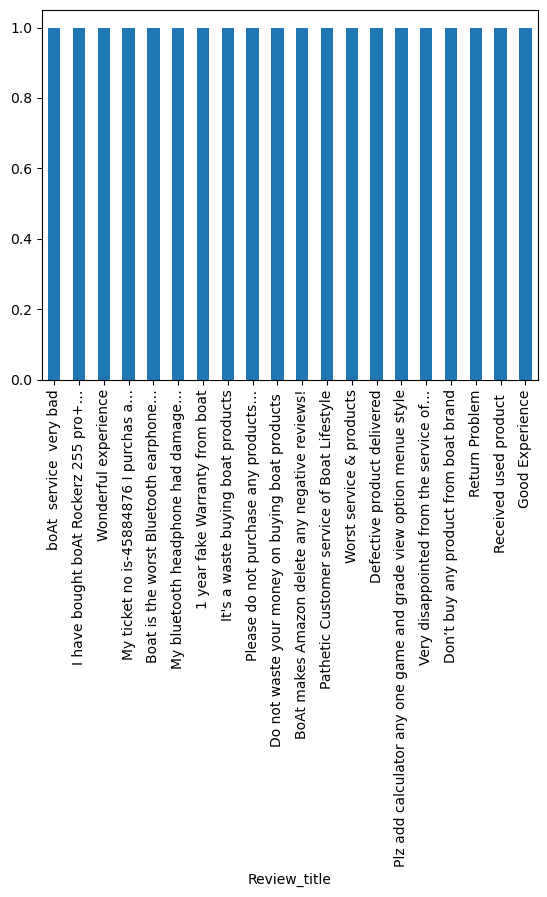

In [52]:
#Now Univariete Analysis
df['Review_title'].value_counts().plot(kind='bar')
plt.show()

In [54]:
#Now creating a word cloud 
from wordcloud import WordCloud
text=df["Review_title"]     #first creating a word cloud for Review_title

# Concatenate all text into one string
text = " ".join(Review_title for Review_title in text)

# Generate Word Cloud
wordcloud_Review_title = WordCloud(width=800, height=400, background_color='white').generate(text)

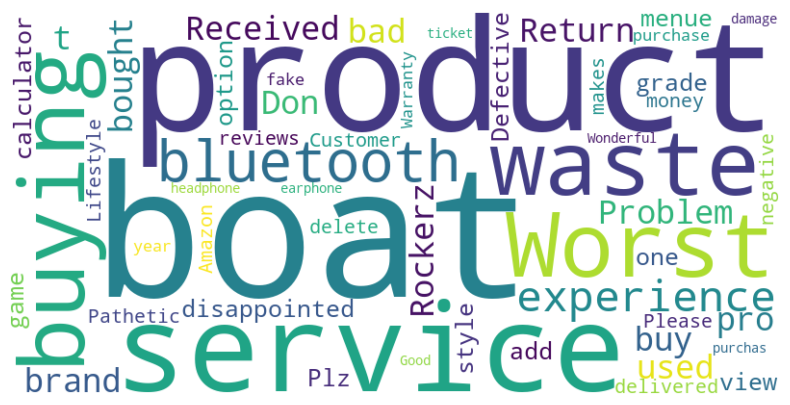

In [56]:
# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_Review_title, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

#From word cloud we can see that the words which are important & occuring frequantly appear large is size, word cloud eleminates the stopwords completely 
#Here boat ,product ,servive ,buying ,worst etc are occuring more fraquently so they are bigger in size

In [58]:
text2=df["Review"]     #first creating a word cloud for Reviews

# Concatenate all text into one string
text2 = " ".join(Review for Review in text2)

# Generate Word Cloud
wordcloud_Review = WordCloud(width=800, height=400, background_color='white').generate(text2)

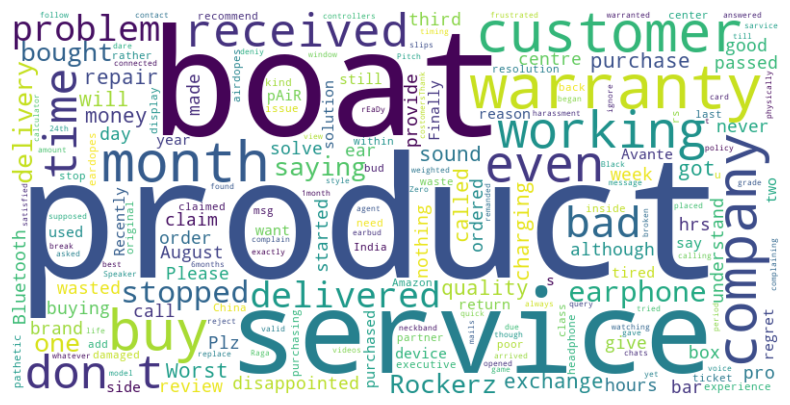

In [60]:
# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_Review, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

#From word cloud we can see that the words which are important & occuring frequantly appear large is size, word cloud eleminates the stopwords completely 
#Here boat,product,service,warrnaty etc are occuring more fraquently so they are bigger in size

In [64]:
#Sentiment Analysis
import pandas as pd
from textblob import TextBlob
sent="This very bad servive"
pol=TextBlob(sent).sentiment.polarity
pol
#from this polarity we came to now that word is positive or negative
#Positive Sentiment: Polarity > 0
#Negative Sentiment: Polarity < 0
#Neutral Sentiment: Polarity = 0

-0.9099999999999998

In [66]:
df=pd.read_csv(r"C:\Users\ADMIN\8-Text Mining\Assignments\Trustpilot_boat1.csv")
df.head()
df['polarity']=df['Review'].apply(lambda x:TextBlob(str(x)).sentiment.polarity)
df['polarity']

#From this we came to know sentiment polarity of all the reviews from the data


0    -0.508095
1     0.143750
2    -0.487500
3    -0.018750
4    -0.151852
5     0.000714
6    -0.356250
7    -0.205000
8    -0.293929
9    -0.180000
10    0.157727
11    0.100000
12    0.050000
13    0.058333
14   -0.062500
15    0.187500
16   -0.416667
17    0.255682
18    0.200000
19    0.800000
Name: polarity, dtype: float64

In [68]:
df=pd.read_csv(r"C:\Users\ADMIN\8-Text Mining\Assignments\Trustpilot_boat1.csv")
df.head()
df['polarity']=df['Review_title'].apply(lambda x:TextBlob(str(x)).sentiment.polarity)
df['polarity']

#From this we came to know sentiment polarity of all the review_title from the data

0    -0.910
1     0.000
2     0.000
3     0.000
4     0.000
5    -0.975
6    -0.400
7     0.000
8    -1.000
9    -1.000
10   -0.375
11    0.100
12    0.000
13   -0.200
14   -0.500
15    0.000
16   -1.000
17    0.000
18    1.000
19    0.700
Name: polarity, dtype: float64

In [ ]:
#Benefits and Impact of Solution :
#                                By analyzing reviews of the movie "Boat company," they can understand that there are 50 -50 % customers are satisfied
#                                with there product .On the above analysis the boat business can check on which produbts they have to work .By this we 
#                                understand that there are many customers who are not satisfied with there services .